In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

                  petal length (cm) petal width (cm)
sepal length (cm)              1.60            -0.31
sepal width (cm)               1.77             0.28


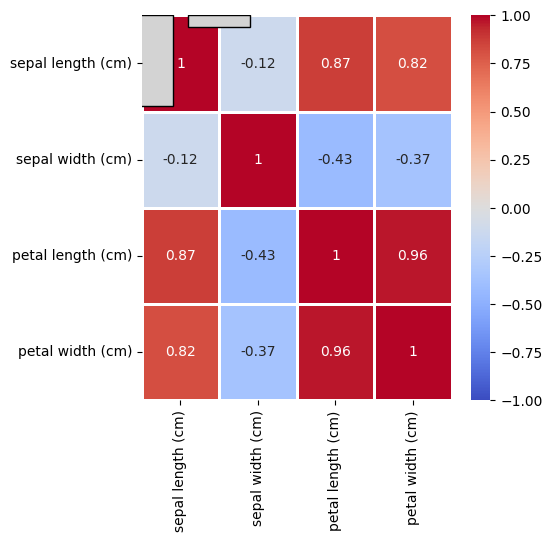

In [13]:
X,_ = load_iris(return_X_y=True, as_frame=True)
corr_coeff = X.corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)

X1 = X.iloc[:, :2] # extract first two columns to create a sepal-related features dataset
X2 = X.iloc[:, 2:] # extract last two columns to create a petal-related features dataset
scaler = StandardScaler()
X1_sc = scaler.fit_transform(X1)
X2_sc = scaler.fit_transform(X2)
n_comp=2 #choose number of canonical variates pairs
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X1_sc, X2_sc) #fit our scaled data
X1_c, X2_c = cca.transform(X1_sc, X2_sc) #transform our datasests to obtain canonical variates

comp_corr = [np.corrcoef(X1_c[:, i], X2_c[:, i])[1][0] for i in range(n_comp)]
plt.bar(['CC1', 'CC2'], comp_corr, color='lightgrey', width = 0.8, edgecolor='k')

cca.x_loadings_ #get loadings for canonical variate of X1 dataset
# array([[ 0.89224641, 0.3880084 ],
# [-0.45786609, 0.92165584]])
# # An array of shape (n_features, n_components).
# # First feature of the X1 dataset has a strong, positive influence on the first canonical variate
# of the X1 dataset
# Second feature influences the second canonical variate of the X1 dataset.
cca.y_loadings_ #get loadings for canonical variate of X2 dataset
# array([[1.5732248 , 0.33270605],
# [1.45353265, 0.94303059]])
# Both features have a strong, positive influence on the first canonical variate of the X2
# dataset, while the second feature influences the second canonical variate of the X2 dataset more.

coef_df = pd.DataFrame(np.round(cca.coef_, 2), columns = [X2.columns])
coef_df.index = X1.columns
print(coef_df)

In [11]:
# We will split this dataset into two data frames one containing only sepal-related features and
# # one with only petal-related features.
# X1 = X.iloc[:, :2] # extract first two columns to create a sepal-related features dataset
# X2 = X.iloc[:, 2:] # extract last two columns to create a petal-related features dataset
X1 = X.iloc[:,[0, 1]]
X2 = X.iloc[:,[2, 3]]

scaler = StandardScaler()
X1_sc = scaler.fit_transform(X1)
X2_sc = scaler.fit_transform(X2)
n_comp=2 #choose number of canonical variates pairs
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X1_sc, X2_sc) #fit our scaled data
X1_c, X2_c = cca.transform(X1_sc, X2_sc) #transform our datasests to obtain canonical variates



# coef_df = pd.DataFrame(np.round(cca.coef_, 2), columns = [X2.columns])
# coef_df.index = X1.columns

# coef_df

array([ 1.60230664, -0.31356866])